## Predicting Income Levels Using Machine Learning Using  Random Forest Algorithm

**Dataset Columns**


- Age: Numeric, representing the individual's age.


- Workclass: Categorical, describing the type of employer or employment status (e.g., State-gov, Private).


- Education: Categorical, representing the highest education level achieved (e.g., Bachelors, HS-grad).


- Education-num: Numeric, an encoded version of education level.


- Marital-status: Categorical, describing marital situation (e.g., Never-married, Married-civ-spouse).


- Occupation: Categorical, describing the type of job (e.g., Prof-specialty, Exec-managerial).


- Relationship: Categorical, indicating familial role (e.g., Husband, Wife).


- Race: Categorical, describing ethnicity (e.g., White, Black, Asian-Pac-Islander).


- Sex: Categorical, indicating gender (e.g., Male, Female).


- Hours-per-week: Numeric, showing the number of hours worked per week.


- Native-country: Categorical, indicating the individual's country of origin.


- Salary: Categorical, the target variable (<=50K or >50K).

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize



In [2]:
# Load dataset (Assuming the dataset is stored in a CSV file named "census_data.csv")
df = pd.read_csv("census_data.csv")


In [3]:
# Step 1: Data Preprocessing
# Check for missing values and replace "?" with NaN
df.replace("?", np.nan, inplace=True)


In [4]:
# Drop rows with missing values
df.dropna(inplace=True)

In [5]:
# Encode categorical variables
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 
                    'relationship', 'race', 'sex', 'native-country', 'salary']

In [6]:
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


In [7]:
# Separate features and target
X = df.drop(columns=["salary"])
y = df["salary"]

In [8]:
# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ['age', 'education-num', 'hours-per-week']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

######  Exploratory Data Analysis (EDA)

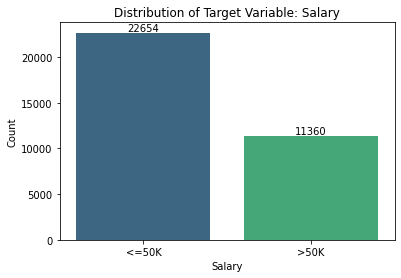

In [10]:
# Map encoded salary values back to their original labels
df['salary'] = df['salary'].map({0: '<=50K', 1: '>50K'})

# Plot the distribution of the target variable (salary)
ax = sns.countplot(x="salary", data=df, palette="viridis")
plt.title("Distribution of Target Variable: Salary")
plt.xlabel("Salary")
plt.ylabel("Count")

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.show()


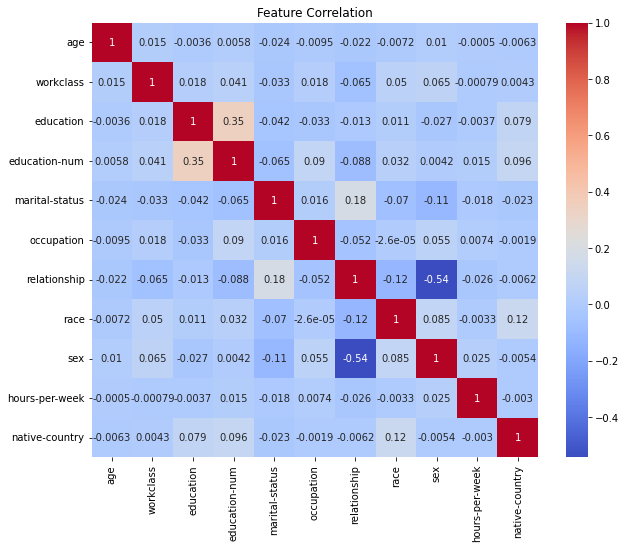

In [11]:
# Correlation heatmap
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

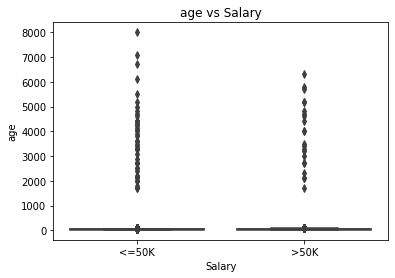

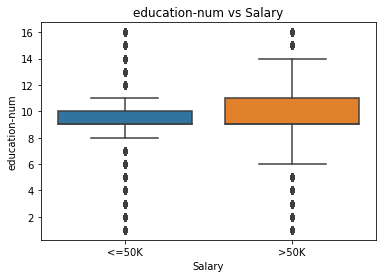

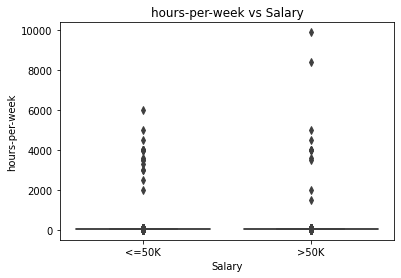

In [12]:
# Plot boxplots for numerical features against the target variable (salary)
for col in numerical_cols:
    sns.boxplot(x=df['salary'], y=df[col])
    plt.title(f"{col} vs Salary")
    plt.xlabel("Salary")
    plt.ylabel(col)
    plt.show()


#### Model Training

In [13]:
# Initialize and train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

###### Model Evaluation

In [14]:


# Predict on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [15]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.75      0.66      4513
           1       0.29      0.16      0.21      2232
           2       0.45      0.45      0.45      1538
           3       0.25      0.14      0.18       762

    accuracy                           0.50      9045
   macro avg       0.39      0.38      0.37      9045
weighted avg       0.46      0.50      0.47      9045



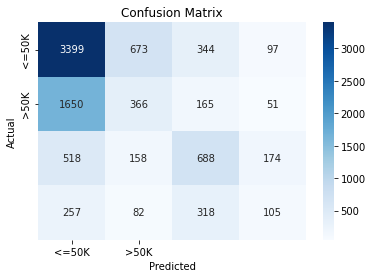

In [16]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

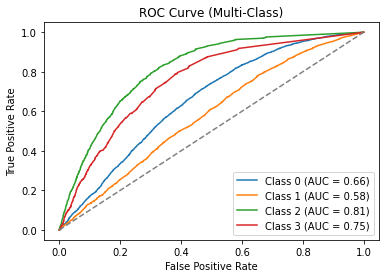

In [17]:

# Binarize the target labels
classes = sorted(y.unique())
y_test_binarized = label_binarize(y_test, classes=classes)

# Compute ROC curve for each class
for i, class_label in enumerate(classes):
    fpr, tpr, thresholds = roc_curve(y_test_binarized[:, i], model.predict_proba(X_test)[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc_score(y_test_binarized[:, i], model.predict_proba(X_test)[:, i]):.2f})")

# Plot diagonal line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve (Multi-Class)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


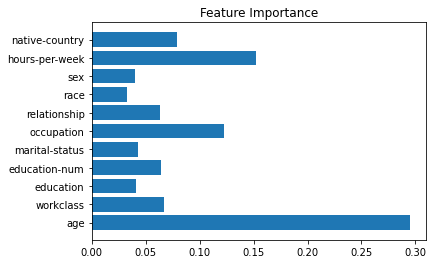

In [18]:
#Feature Importance

importances = model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importances)
plt.title("Feature Importance")
plt.show()


In [19]:
# Cross-Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", np.mean(scores))


Cross-Validation Accuracy: 0.4917212218871854
